In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re

# plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

# stats
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm

import statsmodels.api as sm
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

data = pd.read_pickle('Data/maven_toys.pkl')

In [3]:
# Check the shape of the DataFrame
data.shape

(829262, 16)

In [4]:
# Check the data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829262 entries, 0 to 829261
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Store_Location         829262 non-null  object 
 1   Store_Name             829262 non-null  object 
 2   Product_Category       829262 non-null  object 
 3   Product_Price          829262 non-null  object 
 4   Product_Cost           829262 non-null  object 
 5   Date                   829262 non-null  object 
 6   Units                  829262 non-null  int64  
 7   Sale_Payment_Type      829262 non-null  object 
 8   Product_Name           829262 non-null  object 
 9   Customer_Satisfaction  789954 non-null  float64
 10  Store_City             829262 non-null  object 
 11  Sale_ID                829262 non-null  int64  
 12  Store_ID               829262 non-null  int64  
 13  Product_ID             829262 non-null  int64  
 14  Store_Open_Date        829262 non-nu

In [5]:
# Fill missing values in 'Customer_Satisfaction' with the median
data['Customer_Satisfaction'].fillna(data['Customer_Satisfaction'].median(), inplace=True)

# Check if there are any missing values left
data.isnull().sum()

Store_Location           0
Store_Name               0
Product_Category         0
Product_Price            0
Product_Cost             0
Date                     0
Units                    0
Sale_Payment_Type        0
Product_Name             0
Customer_Satisfaction    0
Store_City               0
Sale_ID                  0
Store_ID                 0
Product_ID               0
Store_Open_Date          0
Customer_Reference       0
dtype: int64

In [6]:
# Convert 'Date' and 'Store_Open_Date' to datetime type
data['Date'] = pd.to_datetime(data['Date'])
data['Store_Open_Date'] = pd.to_datetime(data['Store_Open_Date'])

# Check the data types again to confirm
data.dtypes

Store_Location                   object
Store_Name                       object
Product_Category                 object
Product_Price                    object
Product_Cost                     object
Date                     datetime64[ns]
Units                             int64
Sale_Payment_Type                object
Product_Name                     object
Customer_Satisfaction           float64
Store_City                       object
Sale_ID                           int64
Store_ID                          int64
Product_ID                        int64
Store_Open_Date          datetime64[ns]
Customer_Reference               object
dtype: object

In [7]:
# Find the top 10 best-selling products
top_products = data.groupby('Product_Name')['Units'].sum().sort_values(ascending=False).head(10)
top_products

Product_Name
Colorbuds          104368
PlayDoh Can        103128
Barrel O' Slime     91663
Deck Of Cards       84034
Magic Sand          60598
Splash Balls        60248
Lego Bricks         59737
Action Figure       57958
Rubik's Cube        45672
Animal Figures      39089
Name: Units, dtype: int64

In [8]:
# Find the most popular product categories
top_categories = data.groupby('Product_Category')['Units'].sum().sort_values(ascending=False)
top_categories

Product_Category
Art & Crafts         325574
Toys                 267200
Games                194673
Sports & Outdoors    169043
Electronics          134075
Name: Units, dtype: int64

In [9]:
# Compare the sales of the stores in Guadalajara to the sales of stores in other areas
area_sales = data.groupby('Store_Location')['Units'].sum().sort_values(ascending=False)
area_sales

Store_Location
Downtown       628073
Commercial     240648
Residential    125402
Airport         96442
Name: Units, dtype: int64

In [10]:
# Check the unique values in the 'Store_Name' column
data['Store_Name'].unique()

array(['Maven Toys Ciudad de Mexico 2', 'Maven Toys Guadalajara 3',
       'Maven Toys Monterrey 3', 'Maven Toys Campeche 2',
       'Maven Toys Chihuahua 1', 'Maven Toys Ciudad de Mexico 4',
       'Maven Toys Guadalajara 2', 'Maven Toys Guanajuato 2',
       'Maven Toys Hermosillo 3', 'Maven Toys Mexicali 1',
       'Maven Toys Monterrey 4', 'Maven Toys Puebla 1',
       'Maven Toys Saltillo 2', 'Maven Toys Toluca 2',
       'Maven Toys Xalapa 1', 'Maven Toys Aguascalientes 1',
       'Maven Toys Campeche 1', 'Maven Toys Chetumal 1',
       'Maven Toys Chihuahua 2', 'Maven Toys Chilpancingo 1',
       'Maven Toys Ciudad de Mexico 1', 'Maven Toys Ciudad Victoria 1',
       'Maven Toys Cuernavaca 1', 'Maven Toys Culiacan 1',
       'Maven Toys Durango 1', 'Maven Toys Guadalajara 4',
       'Maven Toys Guanajuato 1', 'Maven Toys Hermosillo 2',
       'Maven Toys La Paz 1', 'Maven Toys Merida 1',
       'Maven Toys Mexicali 2', 'Maven Toys Monterrey 2',
       'Maven Toys Morelia 1', 'Ma

In [11]:
# Extract the city name from the 'Store_Name' column
data['City'] = data['Store_Name'].str.split(' ').str[2]

# Compare the sales of the stores in Guadalajara to the sales of stores in other cities
city_sales = data.groupby('City')['Units'].sum().sort_values(ascending=False)
city_sales

City
Ciudad            146100
Guadalajara        96454
Monterrey          93730
Hermosillo         66816
Guanajuato         64317
Puebla             61171
Toluca             48632
Mexicali           44415
Xalapa             44223
Saltillo           42903
Campeche           40833
Chihuahua          40396
Villahermosa       20934
Morelia            20895
Santiago           20286
Culiacan           19909
Tuxtla             19773
San                19635
Pachuca            19185
Chetumal           18965
Oaxaca             18564
Merida             18328
Chilpancingo       18327
Aguascalientes     17865
Durango            17422
Zacatecas          17196
Cuernavaca         17074
La                 16217
Name: Units, dtype: int64

In [12]:
# Compare the sales of the individual stores in Guadalajara
guadalajara_stores = data[data['City'] == 'Guadalajara']
guadalajara_sales = guadalajara_stores.groupby('Store_Name')['Units'].sum().sort_values(ascending=False)
guadalajara_sales

Store_Name
Maven Toys Guadalajara 3    31609
Maven Toys Guadalajara 4    24136
Maven Toys Guadalajara 2    20698
Maven Toys Guadalajara 1    20011
Name: Units, dtype: int64

In [13]:
# Calculate the average customer satisfaction
avg_satisfaction = data['Customer_Satisfaction'].mean()
avg_satisfaction

8.526732202850246

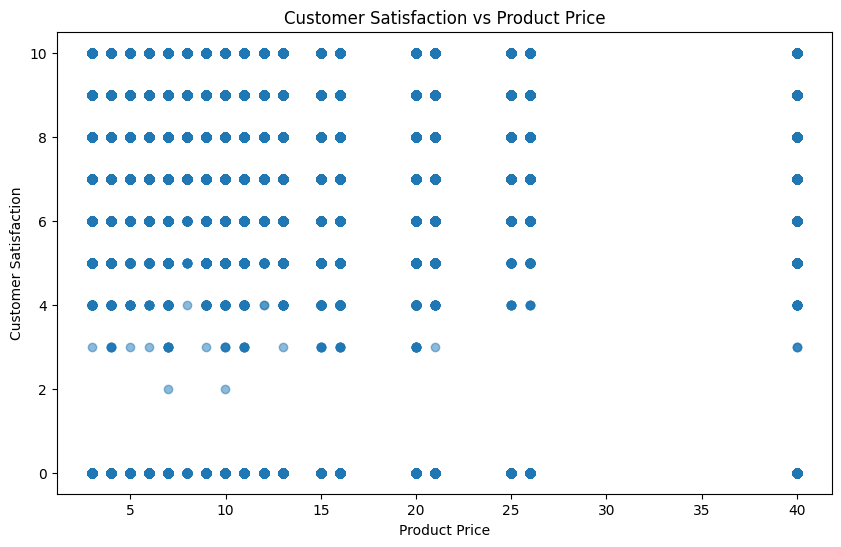

In [14]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Remove the dollar sign from the 'Product_Price' column and convert it to float
data['Product_Price'] = data['Product_Price'].str.replace('$', '').astype(float)

# Create a scatter plot of 'Product_Price' and 'Customer_Satisfaction'
plt.figure(figsize=(10, 6))
plt.scatter(data['Product_Price'], data['Customer_Satisfaction'], alpha=0.5)
plt.title('Customer Satisfaction vs Product Price')
plt.xlabel('Product Price')
plt.ylabel('Customer Satisfaction')
plt.show()

In [15]:
# Calculate the average customer satisfaction for each payment type
payment_satisfaction = data.groupby('Sale_Payment_Type')['Customer_Satisfaction'].mean().sort_values(ascending=False)
payment_satisfaction

Sale_Payment_Type
credit    8.548447
cash      8.479405
Name: Customer_Satisfaction, dtype: float64

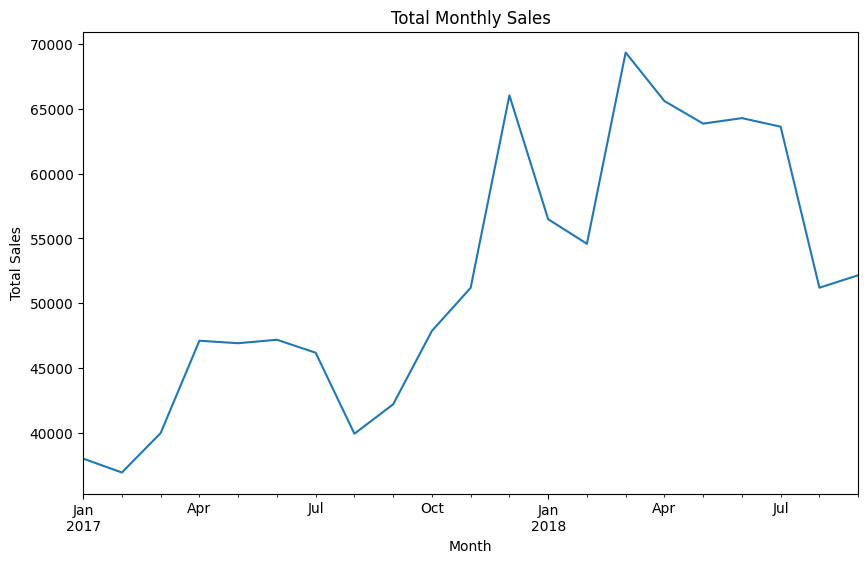

In [16]:
# Extract the month and year from the 'Date' column
data['YearMonth'] = data['Date'].dt.to_period('M')

# Calculate the total sales for each month
monthly_sales = data.groupby('YearMonth')['Units'].sum()

# Create a line plot of the total monthly sales
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line')
plt.title('Total Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

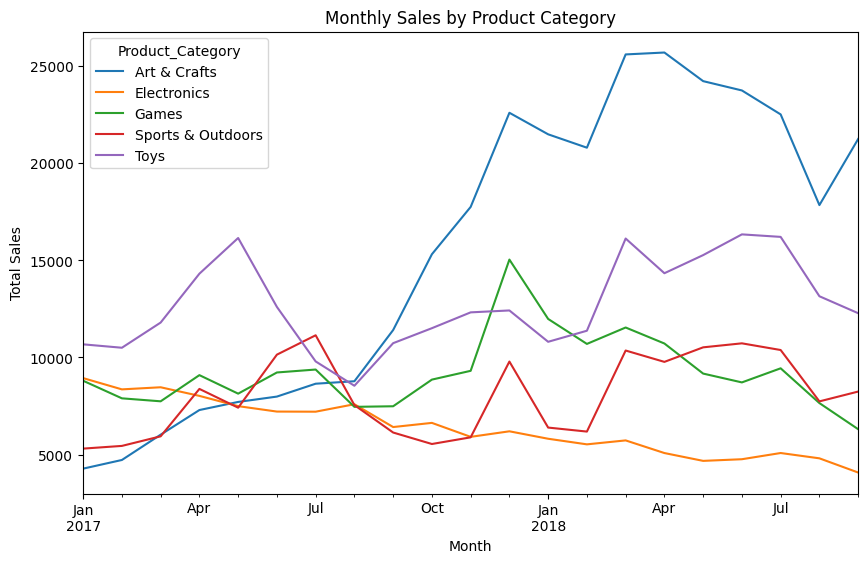

In [17]:
# Calculate the monthly sales for each product category
category_sales = data.groupby(['YearMonth', 'Product_Category'])['Units'].sum().unstack()

# Create a line plot of the monthly sales for each product category
plt.figure(figsize=(10, 6))
category_sales.plot(kind='line', ax=plt.gca())
plt.title('Monthly Sales by Product Category')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

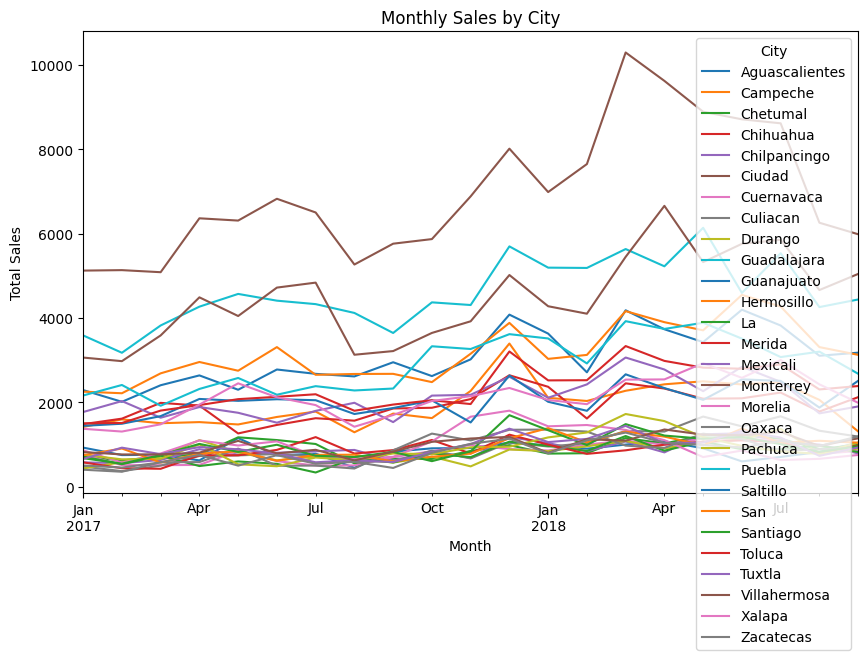

In [18]:
# Calculate the monthly sales for each city
city_sales = data.groupby(['YearMonth', 'City'])['Units'].sum().unstack()

# Create a line plot of the monthly sales for each city
plt.figure(figsize=(10, 6))
city_sales.plot(kind='line', ax=plt.gca())
plt.title('Monthly Sales by City')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

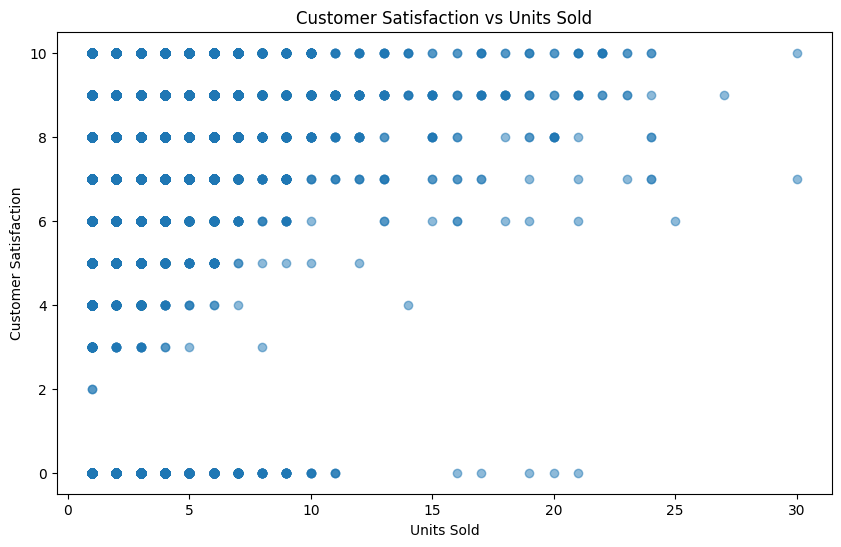

In [19]:
# Create a scatter plot of 'Customer_Satisfaction' and 'Units'
plt.figure(figsize=(10, 6))
plt.scatter(data['Units'], data['Customer_Satisfaction'], alpha=0.5)
plt.title('Customer Satisfaction vs Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Customer Satisfaction')
plt.show()